In [26]:
import pandas as pd

student_assessments = pd.read_csv(r"C:\Users\Abongile\Documents\Intervarsity_Hackathon\Intervarsity_Hackathon\assets\studentAssessment.csv")

student_registration = pd.read_csv(
    r"C:\Users\Abongile\Documents\Intervarsity_Hackathon\Intervarsity_Hackathon\assets\StudentRegistration.csv"
)
student_info = pd.read_csv(r"C:\Users\Abongile\Documents\Intervarsity_Hackathon\Intervarsity_Hackathon\assets\studentInfo.csv")
student_assessments.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [28]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [33]:


max_credits = student_info['studied_credits'].max()
print("Maximum studied credits:", max_credits)

Maximum studied credits: 655


In [34]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [32]:
max_credits = student_info['studied_credits'].max()

# Get the row(s) where studied_credits equals the maximum
student_max_credits = student_info[student_info['studied_credits'] == max_credits]

# Display the row(s)
print(student_max_credits)

     code_module code_presentation  id_student gender                region  \
2778         BBB             2013J      363151      M  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
2778  Lower Than A Level    10-20    35-55                     0   

      studied_credits disability final_result  
2778              655          Y    Withdrawn  


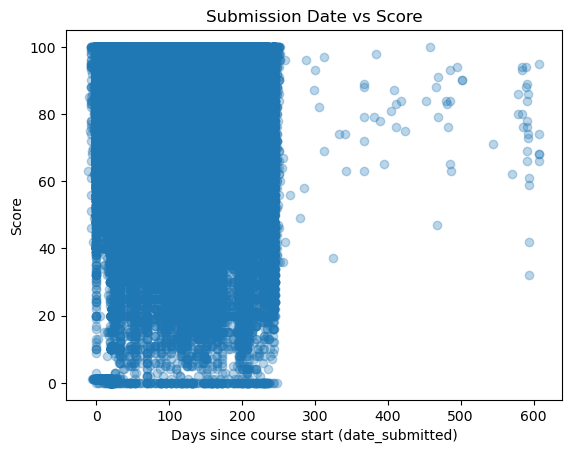

In [14]:
import matplotlib.pyplot as plt

plt.scatter(student_assessments['date_submitted'], student_assessments['score'], alpha=0.3)
plt.xlabel("Days since course start (date_submitted)")
plt.ylabel("Score")
plt.title("Submission Date vs Score")
plt.show()

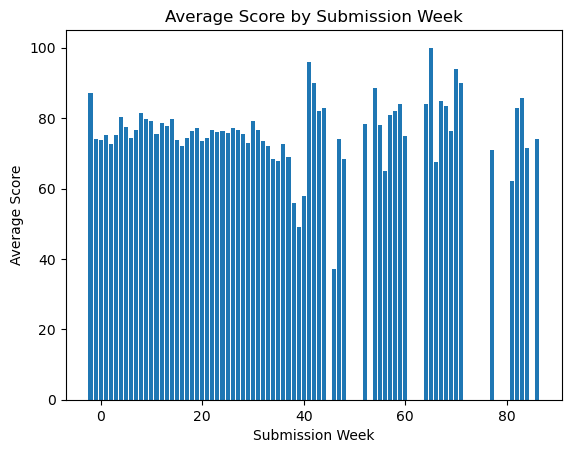

In [15]:
# Optionally bucket into weeks
student_assessments['submission_week'] = (student_assessments['date_submitted'] // 7)

# Average score per week
weekly_avg = student_assessments.groupby('submission_week')['score'].mean().reset_index()

# Plot bar chart
plt.bar(weekly_avg['submission_week'], weekly_avg['score'])
plt.xlabel("Submission Week")
plt.ylabel("Average Score")
plt.title("Average Score by Submission Week")
plt.show()

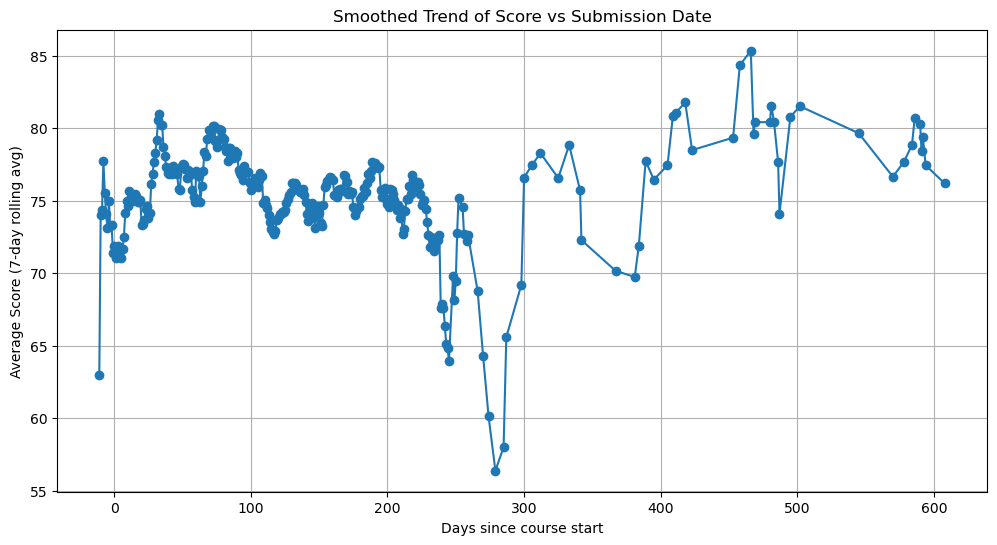

In [19]:
# Example: calculate average score per day
avg_trend = student_assessments.groupby('date_submitted')['score'].mean().reset_index()

# Compute 7-day rolling average
avg_trend['rolling_score'] = avg_trend['score'].rolling(window=7, min_periods=1).mean()

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(avg_trend['date_submitted'], avg_trend['rolling_score'], marker='o')
plt.xlabel("Days since course start")
plt.ylabel("Average Score (7-day rolling avg)")
plt.title("Smoothed Trend of Score vs Submission Date")
plt.grid(True)
plt.show()

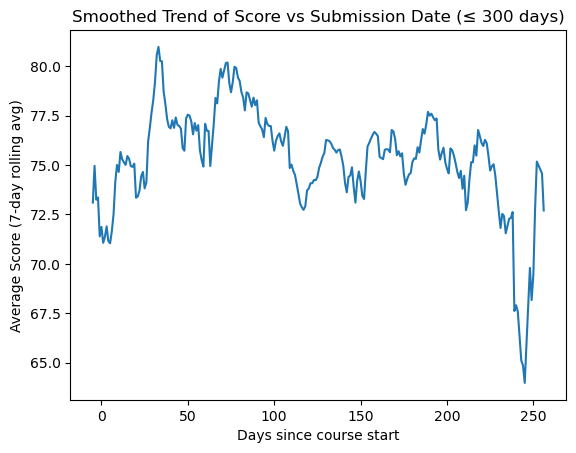

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute rolling average (7-day window)
avg_trend['rolling_score'] = avg_trend['score'].rolling(window=7).mean()

# 🔹 Filter to only include days ≤ 300
filtered = avg_trend[avg_trend['date_submitted'] <= 300]

# Plot
plt.plot(filtered['date_submitted'], filtered['rolling_score'])
plt.xlabel("Days since course start")
plt.ylabel("Average Score (7-day rolling avg)")
plt.title("Smoothed Trend of Score vs Submission Date (≤ 300 days)")
plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features (X) and target (y)
X = student_assessments[['date_submitted']]   # predictor
y = student_assessments['score']              # target

mask = y.notna()
X = X[mask]
y = y[mask]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R²: 0.0007986623029989648
MSE: 349.52728036322674


In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- Load dataset ---
student_assessments = pd.read_csv(
    r"C:\Users\Abongile\Documents\Intervarsity_Hackathon\Intervarsity_Hackathon\assets\studentAssessment.csv"
)

# Keep only the columns we need
df = student_assessments[["date_submitted", "score"]].copy()

# Drop rows where score is missing (NaN)
df = df.dropna(subset=["score"])

# Features and target
X = df[["date_submitted"]]
y = df["score"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# --- User input for prediction ---
while True:
    try:
        user_input = input("Enter days since course start (or 'q' to quit): ")
        if user_input.lower() == "q":
            break
        date_submitted = float(user_input)

        # Predict score
        predicted_score = model.predict([[date_submitted]])[0]

        # Clip to valid range [0, 100]
        predicted_score = np.clip(predicted_score, 0, 100)

        print(f"Predicted score: {predicted_score:.2f}")
    except Exception as e:
        print("Invalid input, please enter a number (e.g., 120).")


Enter days since course start (or 'q' to quit):  q


In [23]:
import pandas as pd

# Load dataset
student_assessments = pd.read_csv(
    r"C:\Users\Abongile\Documents\Intervarsity_Hackathon\Intervarsity_Hackathon\assets\studentAssessment.csv"
)

# Drop rows with missing scores
df = student_assessments.dropna(subset=["score"])

# Group by student ID and calculate average score
avg_per_student = df.groupby("id_student")["score"].mean().reset_index()

# Rename columns for clarity
avg_per_student.columns = ["id_student", "average_score"]

# Look at first few rows
print(avg_per_student.head())


   id_student  average_score
0        6516      61.800000
1        8462      87.000000
2       11391      82.000000
3       23629      82.500000
4       23698      74.444444


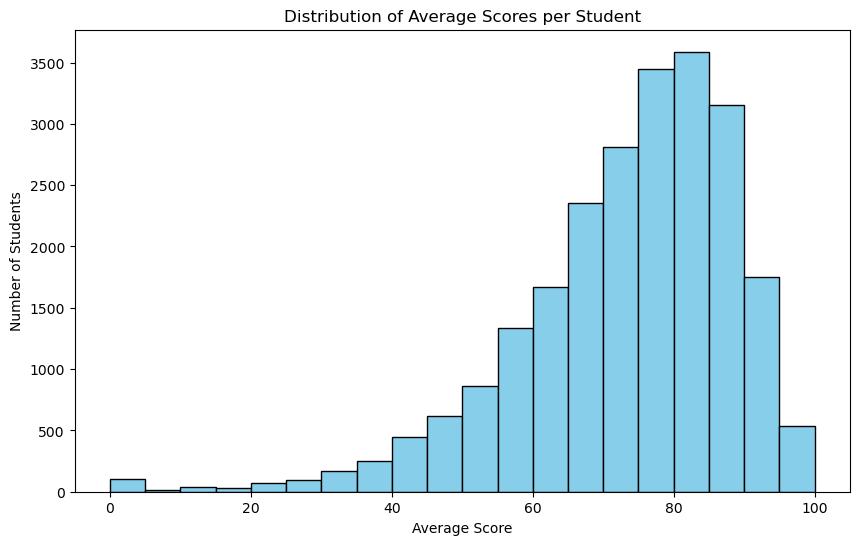

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(avg_per_student["average_score"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Average Scores per Student")
plt.show()


In [25]:
# Drop rows with missing scores
df_scores = student_assessments.dropna(subset=["score"])

# Average score per student
avg_scores = df_scores.groupby("id_student")["score"].mean().reset_index()
avg_scores.columns = ["id_student", "average_score"]

student_registration["completed"] = student_registration["date_unregistration"].isna()

# Merge average scores with registration
avg_scores = avg_scores.merge(
    student_registration[["id_student", "completed"]],
    on="id_student",
    how="left"
)

completed = avg_scores[avg_scores["completed"] == True]["average_score"]
not_completed = avg_scores[avg_scores["completed"] == False]["average_score"]

print("Average score of students who completed the course:", completed.mean())
print("Average score of students who did not complete the course:", not_completed.mean())


Average score of students who completed the course: 74.4371057946708
Average score of students who did not complete the course: 66.56350921635124
